# Airbnb Occupancy

Airbnb business expands rapidly these days and there should be a great deal of opportunities hidden behind Airbnb data. For both hosts and Airbnb, there might involve a large amount of cost to make improvement and attract more guests' interests. So, it might be valuable to carry out a deep research about what the guests cares most when they are searching for a place to stay. 

With accessibiity to __listings, calendar and review__ datasets, I'd like to dip out some potential opportunities for hosts and product roadmap for Airbnb in US major cities. Considering both hosts and Airbnb aim to converting visitors to guests, I select the __"Occupancy Rate"__ as the target variable in this project and figure out some interesting features about location, price, seasonal, cancellation policy and review.  


__Data Source:__ http://insideairbnb.com/

__Datasets:__
- listings
- calendar
- review

__Timebox:__
- reviews: historical data before 2020-01-08
- calendar: 2019-01-18 to 2020-01-08

__Cities:__
- Boston
- Chicago
- Los Angeles
- New York
- San Francisco
- Seattle




In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import plotly.offline as py
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import svm

from string import punctuation

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams

from itertools import chain
from wordcloud import WordCloud

In [2]:
%%HTML
<div class='tableauPlaceholder' id='viz1516349898238' style='position: relative'>
<noscript>
<a href='#'>
<img alt='An Overview of Airbnb Occupancy Rate' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1_rss.png' style='border: none' />
</a>
</noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' />
<param name='site_root' value='' />
<param name='name' value='Titanic_data_mining&#47;Dashboard1' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='filter' value='publish=yes' />
</object>
</div>                
<script type='text/javascript'>                    var divElement = document.getElementById('viz1516349898238');                    
var vizElement = divElement.getElementsByTagName('object')[0];
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>



# Data Preparation

##### Import Data

In [23]:
reviews_SF = pd.read_csv('/Users/liuxuan/Desktop/Tableau/Airbnb SF since Jan 2019/reviews (1).csv')
calendar_SF = pd.read_csv('/Users/liuxuan/Desktop/Tableau/Airbnb SF since Jan 2019/calendar (1).csv')
listings_SF = pd.read_csv('/Users/liuxuan/Desktop/Tableau/Airbnb SF since Jan 2019/listings.csv', encoding= 'unicode_escape')


In [4]:
path  = '/Users/liuxuan/Desktop/Tableau/Airbnb SF since Jan 2019/'
pd.read_csv(path+'/'+city+'/reviews.csv')


NameError: name 'city' is not defined

In [24]:
calendar_LA = pd.read_csv('/Users/liuxuan/Downloads/calendar (1).csv')
reviews_LA = pd.read_csv('/Users/liuxuan/Downloads/reviews (1).csv')
listings_LA = pd.read_csv('/Users/liuxuan/Downloads/listings (1).csv')


/Users/liuxuan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.



In [25]:
calendar_NY = pd.read_csv('/Users/liuxuan/Downloads/calendar (2).csv')
reviews_NY = pd.read_csv('/Users/liuxuan/Downloads/reviews (2).csv')
listings_NY = pd.read_csv('/Users/liuxuan/Downloads/listings (2).csv')


/Users/liuxuan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (43,61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.



In [26]:
calendar_ST = pd.read_csv('/Users/liuxuan/Downloads/calendar (3).csv')
reviews_ST = pd.read_csv('/Users/liuxuan/Downloads/reviews (3).csv')
listings_ST = pd.read_csv('/Users/liuxuan/Downloads/listings (3).csv', encoding= 'unicode_escape')


/Users/liuxuan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.



In [27]:
calendar_BT = pd.read_csv('/Users/liuxuan/Downloads/calendar (4).csv')
reviews_BT = pd.read_csv('/Users/liuxuan/Downloads/reviews (4).csv')
listings_BT = pd.read_csv('/Users/liuxuan/Downloads/listings (4).csv')


In [28]:
calendar_CG = pd.read_csv('/Users/liuxuan/Downloads/calendar (5).csv')
reviews_CG = pd.read_csv('/Users/liuxuan/Downloads/reviews (5).csv')
listings_CG = pd.read_csv('/Users/liuxuan/Downloads/listings (5).csv')


##### Combination

In [29]:
calendar_SF['city'] = 'SF'
calendar_LA['city'] = 'LA'
calendar_BT['city'] = 'Boston'
calendar_CG['city'] = 'Chicago'
calendar_ST['city'] = 'Seattle'
calendar_NY['city'] = 'New York'

reviews_SF['city'] = 'SF'
reviews_LA['city'] = 'LA'
reviews_BT['city'] = 'Boston'
reviews_CG['city'] = 'Chicago'
reviews_ST['city'] = 'Seattle'
reviews_NY['city'] = 'New York'

listings_SF['city'] = 'SF'
listings_LA['city'] = 'LA'
listings_BT['city'] = 'Boston'
listings_CG['city'] = 'Chicago'
listings_ST['city'] = 'Seattle'
listings_NY['city'] = 'New York'

##### Listings

In [30]:
list_SF = listings_SF[['id', 'host_id',  'cancellation_policy', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'zipcode', 'property_type', 'room_type', 'availability_365', 'review_scores_value', 'review_scores_rating', 'city']]
list_LA = listings_LA[['id', 'host_id',  'cancellation_policy', 'neighbourhood_group_cleansed','latitude', 'longitude', 'zipcode', 'property_type', 'room_type', 'availability_365', 'review_scores_value', 'review_scores_rating', 'city']]
list_NY = listings_NY[['id', 'host_id',  'cancellation_policy', 'neighbourhood_group_cleansed','latitude', 'longitude', 'zipcode', 'property_type', 'room_type', 'availability_365', 'review_scores_value', 'review_scores_rating', 'city']]
list_ST = listings_ST[['id', 'host_id',  'cancellation_policy', 'neighbourhood_group_cleansed','latitude', 'longitude', 'zipcode', 'property_type', 'room_type', 'availability_365', 'review_scores_value', 'review_scores_rating', 'city']]
list_BT = listings_BT[['id', 'host_id',  'cancellation_policy', 'neighbourhood_group_cleansed','latitude', 'longitude', 'zipcode', 'property_type', 'room_type', 'availability_365', 'review_scores_value', 'review_scores_rating', 'city']]
list_CG = listings_CG[['id', 'host_id',  'cancellation_policy', 'neighbourhood_group_cleansed','latitude', 'longitude', 'zipcode', 'property_type', 'room_type', 'availability_365', 'review_scores_value', 'review_scores_rating', 'city']]

lists = pd.concat([list_SF, list_LA, list_BT, list_CG, list_ST, list_NY])
lists

id    host_id          cancellation_policy  \
0           958       1169                     moderate   
1          5858       8904  strict_14_with_grace_period   
2          7918      21994  strict_14_with_grace_period   
3          8142      21994  strict_14_with_grace_period   
4          8339      24215  strict_14_with_grace_period   
...         ...        ...                          ...   
50712  31417507  208098286                     flexible   
50713  31417946   16828494  strict_14_with_grace_period   
50714  31418014    5637331                     flexible   
50715  31418479   35637051                     moderate   
50716  31419514   10591357                     flexible   

      neighbourhood_group_cleansed   latitude   longitude zipcode  \
0                              NaN  37.769310 -122.433856   94117   
1                              NaN  37.745112 -122.421018   94110   
2                              NaN  37.766690 -122.452505   94117   
3                              NaN  37.764872 -122.451828   94117   
4                              NaN  37.775249 -122.436374   94117   
...                            ...        ...         ...     ...   
50712                    Manhattan  40.792277  -73.946868   10016   
50713                       Queens  40.714854  -73.912625   11378   
50714                    Manhattan  40.762703  -73.964215   10022   
50715                       Queens  40.755819  -73.933339   11101   
50716                     Brooklyn  40.715511  -73.952427   11211   

      property_type        room_type  availability_365  review_scores_value  \
0         Apartment  Entire home/apt                75                 10.0   
1         Apartment  Entire home/apt                 0                  9.0   
2         Apartment     Private room               365                  8.0   
3         Apartment     Private room               365                  9.0   
4             House  Entire home/apt                89                  9.0   
...             ...              ...               ...                  ...   
50712     Apartment     Private room                49                  NaN   
50713     Apartment  Entire home/apt               362                  NaN   
50714     Apartment  Entire home/apt                20                  NaN   
50715     Apartment  Entire home/apt               365                  NaN   
50716     Apartment     Private room               178                  NaN   

       review_scores_rating      city  
0                      97.0        SF  
1                      98.0        SF  
2                      85.0        SF  
3                      93.0        SF  
4                      97.0        SF  
...                     ...       ...  
50712                   NaN  New York  
50713                   NaN  New York  
50714                   NaN  New York  
50715                   NaN  New York  
50716                   NaN  New York  

[123850 rows x 13 columns]

##### Review

In [31]:
reviews = pd.concat([reviews_SF, reviews_LA, reviews_BT, reviews_CG, reviews_ST, reviews_NY])
reviews

listing_id         id        date  reviewer_id reviewer_name  \
0              958       5977  2009-07-23        15695      Edmund C   
1              958       6660  2009-08-03        26145         Simon   
2              958      11519  2009-09-27        25839         Denis   
3              958      16282  2009-11-05        33750          Anna   
4              958      26008  2010-02-13        15416       Venetia   
...            ...        ...         ...          ...           ...   
380477    31388375  401165518  2019-01-13     27446224          Jess   
380478    31392208  401190212  2019-01-13    225477859        Amanda   
380479    31392208  401981016  2019-01-16    234218569           Amy   
380480    31443799  401706983  2019-01-15    134333060       Gabriel   
380481    31597047  401751848  2019-01-15    121096995            Ag   

                                                 comments      city  
0       Our experience was, without a doubt, a five st...        SF  
1       Returning to San Francisco is a rejuvenating t...        SF  
2       We were very pleased with the accommodations a...        SF  
3       We highly recommend this accomodation and agre...        SF  
4       Holly's place was great. It was exactly what I...        SF  
...                                                   ...       ...  
380477  The Whale song Retreat is a unique oil\nolder ...  New York  
380478  This home is adorable, and in the perfect loca...  New York  
380479                                      A great night  New York  
380480  Max's place was a very cozy and comfortable pl...  New York  
380481  The host canceled this reservation 2 days befo...  New York  

[3554283 rows x 7 columns]

##### Calendar

In [32]:
calendar = pd.concat([calendar_SF, calendar_LA, calendar_BT, calendar_CG, calendar_ST, calendar_NY])
calendar

listing_id        date available    price adjusted_price  \
0              56621  2019-01-09         f   $55.00         $55.00   
1                958  2019-01-09         f  $178.00        $178.00   
2                958  2019-01-10         f  $178.00        $178.00   
3                958  2019-01-11         f  $150.00        $150.00   
4                958  2019-01-12         f  $150.00        $150.00   
...              ...         ...       ...      ...            ...   
18511700    31418479  2020-01-04         t  $128.00        $128.00   
18511701    31418479  2020-01-05         t  $128.00        $128.00   
18511702    31418479  2020-01-06         t  $128.00        $128.00   
18511703    31418479  2020-01-07         t  $128.00        $128.00   
18511704    31418479  2020-01-08         t  $128.00        $128.00   

          minimum_nights  maximum_nights      city  
0                   30.0           365.0        SF  
1                    1.0            30.0        SF  
2                    1.0            30.0        SF  
3                    1.0            30.0        SF  
4                    1.0            30.0        SF  
...                  ...             ...       ...  
18511700             1.0          1125.0  New York  
18511701             1.0          1125.0  New York  
18511702             1.0          1125.0  New York  
18511703             1.0          1125.0  New York  
18511704             1.0          1125.0  New York  

[45223848 rows x 8 columns]

# Occupancy Rate

In [33]:
df_OR = pd.merge(lists, calendar, left_on = 'id', right_on = 'listing_id', how = 'outer')
df_OR = df_OR[['date', 'listing_id', 'host_id', 'cancellation_policy', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'availability_365', 'review_scores_value', 'review_scores_rating', 'city_x', 'available', 'price', 'adjusted_price']].rename(columns = {'city_x':'city'})
df_OR


date  listing_id  host_id cancellation_policy  \
0         2019-01-09         958   1169.0            moderate   
1         2019-01-10         958   1169.0            moderate   
2         2019-01-11         958   1169.0            moderate   
3         2019-01-12         958   1169.0            moderate   
4         2019-01-13         958   1169.0            moderate   
...              ...         ...      ...                 ...   
45223843  2020-01-07    31332147      NaN                 NaN   
45223844  2020-01-08    31332147      NaN                 NaN   
45223845  2020-01-09    31332147      NaN                 NaN   
45223846  2020-01-10    31332147      NaN                 NaN   
45223847  2020-01-11    31332147      NaN                 NaN   

         neighbourhood_group_cleansed  latitude   longitude property_type  \
0                                 NaN  37.76931 -122.433856     Apartment   
1                                 NaN  37.76931 -122.433856     Apartment   
2                                 NaN  37.76931 -122.433856     Apartment   
3                                 NaN  37.76931 -122.433856     Apartment   
4                                 NaN  37.76931 -122.433856     Apartment   
...                               ...       ...         ...           ...   
45223843                          NaN       NaN         NaN           NaN   
45223844                          NaN       NaN         NaN           NaN   
45223845                          NaN       NaN         NaN           NaN   
45223846                          NaN       NaN         NaN           NaN   
45223847                          NaN       NaN         NaN           NaN   

                room_type  availability_365  review_scores_value  \
0         Entire home/apt              75.0                 10.0   
1         Entire home/apt              75.0                 10.0   
2         Entire home/apt              75.0                 10.0   
3         Entire home/apt              75.0                 10.0   
4         Entire home/apt              75.0                 10.0   
...                   ...               ...                  ...   
45223843              NaN               NaN                  NaN   
45223844              NaN               NaN                  NaN   
45223845              NaN               NaN                  NaN   
45223846              NaN               NaN                  NaN   
45223847              NaN               NaN                  NaN   

          review_scores_rating city available    price adjusted_price  
0                         97.0   SF         f  $178.00        $178.00  
1                         97.0   SF         f  $178.00        $178.00  
2                         97.0   SF         f  $150.00        $150.00  
3                         97.0   SF         f  $150.00        $150.00  
4                         97.0   SF         f  $150.00        $150.00  
...                        ...  ...       ...      ...            ...  
45223843                   NaN  NaN         t   $45.00         $45.00  
45223844                   NaN  NaN         t   $45.00         $45.00  
45223845                   NaN  NaN         t   $45.00         $45.00  
45223846                   NaN  NaN         t   $45.00         $45.00  
45223847                   NaN  NaN         f   $45.00         $45.00  

[45223848 rows x 16 columns]

Select the calendar date during 2019-01-18 - 2020-01-08

In [34]:
# 
df_OR['date'] = pd.to_datetime(df_OR['date']) 
df_OR = df_OR[(df_OR['date'] <= '2020-01-08') & (df_OR['date'] >= '2019-01-18') == True]

### Calculate occupancy rate

In [35]:
available_dict = {'t': 1, 'f': 0}
df_OR['available'] = df_OR['available'].map(available_dict)

/Users/liuxuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
py.init_notebook_mode(connected=True)

data = df_OR[['date', 'listing_id', 'zipcode','neighbourhood_group_cleansed', 'available']]
data['occupied'] = 1-data['available']
grp = data.groupby(['date', 'neighbourhood_group_cleansed']).agg({'occupied':'mean', 'listing_id':'nunique'}).reset_index().rename(columns = {'occupied':'Occupancy Rate', 'listing_id':'Total Properties'})
#grp = grp.reset_index().rename(columns = {'occupied':'Occupancy Rate', 'listing_id':'Total Properties'})
#grp['Date'] = pd.to_datetime(grp['ObservationDate'])
#grp['Date'] = grp['Date'].dt.strftime('%m/%d/%Y')
#grp['Active'] = grp['Confirmed'] - grp['Recovered'] - grp['Deaths']
grp['District'] =  grp['neighbourhood_group_cleansed']

fig = px.choropleth(grp, locations='zipcode',  
                     color="Occupancy Rate", hover_name="neighbourhood_group_cleansed",hover_data = [grp['Occupancy Rate'],grp['Total Properties']],scope = 'usa'
                     animation_frame="date",width=1000, height=700,
                     color_continuous_scale='Reds',
                     range_color=[1000,5000],
                     title='Map of US Major Cities Occupancy Rate')

fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

SyntaxError: invalid syntax (<ipython-input-17-44ca076e9403>, line 14)

In [42]:
def Occupancy_Rate(data, category):
    return (1-data.groupby(category)['available'].mean()).reset_index().rename(columns = {'available':'occupancy_rate'})

In [43]:
def Occupancy_Rate_Plot(data, category):
    plt.style.use('seaborn-whitegrid')
    sns.lineplot(x = OR[category], y = OR['occupancy_rate'], data = OR)
    plt.title("Occupancy Rate by "+str(category))
    plt.ylabel("Occupancy Rate")
    plt.xlabel(str(category))

In [44]:
def Category_Frequency(data, category):
    return data.groupby([category])['listing_id'].nunique().reset_index().rename(columns = {'listing_id':'count'}).sort_values(by = 'count', ascending = False)

In [45]:
def Category_Frequency_Plot(data, category):
    fig = px.bar(data[[category, 'count']].sort_values('count', ascending=False), 
                 y='count', x=str(category),
                 log_y=True, template='ggplot2', title= 'Frequency of Places Available by '+str(category))
    fig.show()


##### Occupancy Rate through Timeline

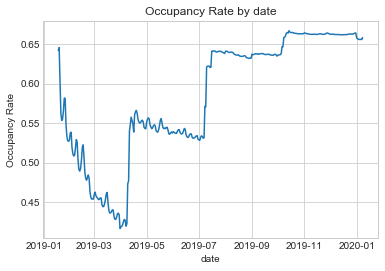

In [46]:
category = 'date'
OR = Occupancy_Rate(df_OR, category)
Occupancy_Rate_Plot(df_OR, category)

The time-series occupancy rate highly correlated to holiday seasons. It is a sharp drop for occupancy in Q1 but increased gradient in Q2 to Q4. The occupancy remains higher in the Q4.

##### Occupancy Rate by Cancellation Policy

cancellation_policy  occupancy_rate
0                     flexible        0.671298
1                     moderate        0.609310
2                       strict        0.546945
3  strict_14_with_grace_period        0.514181
4              super_strict_30        0.329252
5              super_strict_60        0.202117

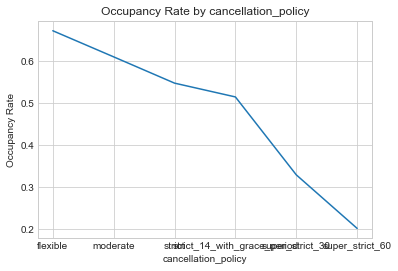

In [36]:
category = 'cancellation_policy'
OR = Occupancy_Rate(df_OR, category)
Occupancy_Rate_Plot(df_OR, category)
OR

Very obviously. The cancellation policy makes strong impact on guests choice.

##### Occupancy Rate by Review Scores

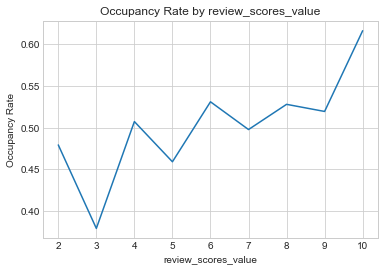

In [37]:
category = 'review_scores_value'
OR = Occupancy_Rate(df_OR, category)
Occupancy_Rate_Plot(df_OR, category)

The review score is also an indicate for guest to select a place.

In [38]:
data = Category_Frequency(df_OR, category)
Category_Frequency_Plot(data, category)

__review_scores_value__ is the average score for an Airbnb property rated by guests. There a few __low__ (2 or 3) score properties, so the occupancy may not be representative. The score might be rated by certain extreme experience.

##### Occupancy Rate by Property Type

property_type  occupancy_rate
38               Timeshare        0.974719
34                   Plane        0.955056
13                    Cave        0.666667
27                     Hut        0.637640
1                Apartment        0.631567
11  Casa particular (Cuba)        0.628411
37                    Tent        0.587511
33                   Other        0.581474
30                    Loft        0.580248
35                  Resort        0.571084
7                      Bus        0.570225
6                 Bungalow        0.567996
15             Condominium        0.566547
41               Townhouse        0.562806
14                  Chalet        0.559145
26               Houseboat        0.554693
24                   Hotel        0.552061
21             Guest suite        0.543656
16                 Cottage        0.526610
25                   House        0.507765
8                    Cabin        0.501990
31          Minsu (Taiwan)        0.500000
22              Guesthouse        0.496434
44                    Yurt        0.488764
39              Tiny house        0.472200
4                     Boat        0.465559
5           Boutique hotel        0.460960
12                  Castle        0.457865
9                Camper/RV        0.457188
32            Nature lodge        0.457163
28                  In-law        0.452247
2                     Barn        0.449438
0               Aparthotel        0.448045
20               Farm stay        0.423432
40                    Tipi        0.406367
3        Bed and breakfast        0.404388
36      Serviced apartment        0.403526
43                   Villa        0.357639
19             Earth house        0.305868
23                  Hostel        0.303933
42               Treehouse        0.272673
10                Campsite        0.184992
17              Dome house        0.146536
18                    Dorm        0.012640
29                  Island        0.000000

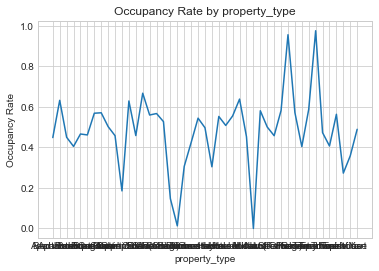

In [39]:
category = 'property_type'
OR = Occupancy_Rate(df_OR, category)
Occupancy_Rate_Plot(df_OR, category)
#OR.sort_values(by = 'occupancy_rate', ascending = False)

For property type category, it is not a actionable factor for hosts. So, we have a glance first. The top occupancy types such as Timeshare, Plane, Hut and Cave are very fanscinating and exclusive chioce.  

We'd better go deep with more marketable property types such as apartment, house, townhouse and etc.

In [40]:
category = 'property_type'
data = Category_Frequency(df_OR, category)
Category_Frequency_Plot(data, category)

##### Occupancy Rate by Room Type

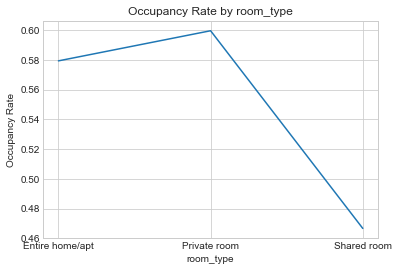

In [41]:
category = 'room_type'
OR = Occupancy_Rate(df_OR, category)
Occupancy_Rate_Plot(df_OR, category)

Makes sense -- the private room is the most popular choive for guests.

##### Occupancy Rate by City

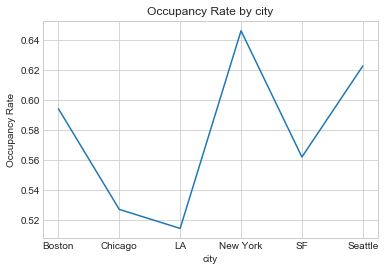

In [42]:
category = 'city'
OR = Occupancy_Rate(df_OR, category)
Occupancy_Rate_Plot(df_OR, category)

##### Occupancy Rate by Price Bins

In [47]:
# Splitting price into 10 bins by quantiles.
df_OR['price'] = df_OR['price'].replace('[\$,]', '', regex = True).astype(float)
bins=df_OR['price'].quantile(np.arange(0,1,1/10))
df_OR['price_bin'] = pd.cut(df_OR['price'], bins=bins, labels = np.array(bins[np.arange(0,0.9,1/10)]), include_lowest = True).astype(float)

/Users/liuxuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/liuxuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



__'price'__ are splitted into 10 bins by quantiles of 10% increment and each __price_bin__ is label by the lower boundary of price in this bin.

In [40]:
category = 'price_bin'
OR = Occupancy_Rate(df_OR, category)
Occupancy_Rate_Plot(df_OR, category)
OR

KeyError: 'price_bin'

-- Not surprisingly! Price have very obvious impact on the occupancy rate. It is very interesting that the properties with price in range [$50, $150] achieves higher occupancy. In the following part, I will develop tree-based model to learn more about splitting point of prices. 

In [52]:
data = Category_Frequency(df_OR, category)
Category_Frequency_Plot(data, category)

##### Map by neighbour / by city

In [10]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_geos(
    visible=False, resolution=50, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Machine Learning Prediction

There are some factors which have obvious impact for guests' choice. In the following, we'd like to train the models to figure out the top important factors and how the factors impact on the occupancy rate.

Firstly, to set up binary classification of __Occupancy Rate__, the distribution of property's occupancy rate should be calculated out. 

##### Occupancy Rate Distribution

In [ ]:
OR = Occupancy_Rate(df_OR, 'listing_id')
df_OR = OR.merge(df_OR, how = 'left', on = 'listing_id')
df_OR = df_OR.dropna(subset = ['occupancy_rate'], axis = 0)


In [ ]:
df_OR

In [ ]:
bins=df_OR['occupancy_rate'].quantile(np.arange(0,1,1/5))
df_OR['occupancy_rate_bin'] = pd.cut(df_OR['occupancy_rate'], bins = bins, labels = np.array(bins[np.arange(0.2,1,1/5)]), include_lowest = True).astype(float)
bins

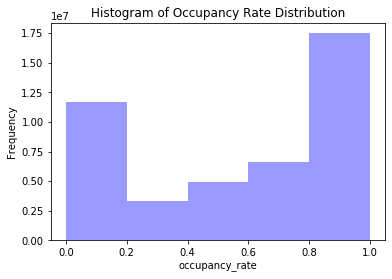

In [41]:
category = 'occupancy_rate'
sns.distplot(list(df_OR[category].values), bins=5,kde=False, color = 'blue')
plt.title('Histogram of Occupancy Rate Distribution')
plt.xlabel(str(category))
plt.ylabel('Frequency')
plt.show()

In [42]:
category = 'occupancy_rate_bin'
data = Category_Frequency(df_OR, category)
fig = px.bar(data[[category, 'count']], 
                 y='count', x=str(category),
                 log_y=True, template='ggplot2', title= 'Distribution of Occupancy Rate by '+str(category)+' (Quantile)')
fig.show()

In [43]:
category = 'occupancy_rate_bin'
Category_Frequency_Plot(data, category)

##### Binary Classification

Splitting the occupancy rate into binary classification:
- occupancy rate in [0, 0.52]: 0
- occupancy rate in [0.79, 1.00]: 1

In [41]:
neutral = df_OR['occupancy_rate_bin'].unique()[1]
OR_dict = {bins[0] : 0, bins[0.2] : 0, bins[0.4] : 0, bins[0.8] : 1}
df_tree = df_OR[df_OR['occupancy_rate_bin'] != neutral] 
#df_OR['occupancy_rate_binary'] = df_OR[df_OR['occupancy_rate_bin']>=0.79]
#df_OR[df_OR['occupancy_rate_bin']<=0.52]

#bins=df_OR['occupancy_rate'].quantile(np.arange(0,1,1/5))

#df_OR['occupancy_rate_bin'].unique()[2]

KeyError: 'occupancy_rate_bin'

In [ ]:
df_tree = df_tree.dropna()

In [ ]:
df_tree.info()

##### Prediction Model: Random Forest

In [ ]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
for col in ['cancellation_policy', 'property_type', 'room_type','city']:
    le.fit(df_tree[col].astype(str))
    df_tree[col] = le.transform(df_tree[col].astype(str))

In [ ]:
features = ['cancellation_policy', 'property_type', 'room_type', 'review_scores_value', 'city', 'price']
X = df_tree[features]
y = df_tree['occupancy_rate_bin'].map(OR_dict)

In [28]:
X

cancellation_policy  property_type  room_type  review_scores_value  \
0                           3             14          0                  8.0   
1                           3             14          0                  8.0   
2                           3             14          0                  8.0   
3                           3             14          0                  8.0   
4                           3             14          0                  8.0   
...                       ...            ...        ...                  ...   
44016547                    0             38          1                 10.0   
44016548                    0             38          1                 10.0   
44016549                    0             38          1                 10.0   
44016550                    0             38          1                 10.0   
44016551                    0             38          1                 10.0   

          city  price  
0            0  118.0  
1            0  118.0  
2            0  118.0  
3            0  118.0  
4            0  118.0  
...        ...    ...  
44016547     2   43.0  
44016548     2   43.0  
44016549     2   43.0  
44016550     2   43.0  
44016551     2   43.0  

[21152378 rows x 6 columns]

In [29]:
y

0           0
1           0
2           0
3           0
4           0
           ..
44016547    1
44016548    1
44016549    1
44016550    1
44016551    1
Name: occupancy_rate_bin, Length: 21152378, dtype: int64

In [18]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [19]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34)
#clf = RandomForestClassifier(n_estimators=1000, max_depth = 3)
clf = GradientBoostingRegressor(n_estimators=100, max_depth = 3)
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
print('Accuracy: {}%'.format(int(metrics.accuracy_score(y_test, predictions)*100)))

In [ ]:
predictions

# NLP

In [ ]:
df_review = df_tree[['listing_id', 'occupancy_rate_bin']].merge(reviews[['listing_id','comments']], on = 'listing_id', how = 'right')



In [149]:
df_review = pd.merge(lists, reviews, left_on = 'id', right_on = 'listing_id', how = 'right')
df_review = df_review[['listing_id', 'date','review_scores_rating','reviewer_id', 'reviewer_name', 'comments', 'city_x']]
df_review.rename(columns = {'city_x':'city'})

listing_id        date  review_scores_rating  reviewer_id  \
0               958  2009-07-23                  97.0        15695   
1               958  2009-08-03                  97.0        26145   
2               958  2009-09-27                  97.0        25839   
3               958  2009-11-05                  97.0        33750   
4               958  2010-02-13                  97.0        15416   
...             ...         ...                   ...          ...   
3554278    29234189  2018-11-18                   NaN    195046344   
3554279    29234189  2018-11-25                   NaN    220389585   
3554280    29234189  2018-12-15                   NaN     20183355   
3554281    29234189  2019-01-04                   NaN     23852773   
3554282    29330137  2018-10-29                   NaN    159417029   

        reviewer_name                                           comments city  
0            Edmund C  Our experience was, without a doubt, a five st...   SF  
1               Simon  Returning to San Francisco is a rejuvenating t...   SF  
2               Denis  We were very pleased with the accommodations a...   SF  
3                Anna  We highly recommend this accomodation and agre...   SF  
4             Venetia  Holly's place was great. It was exactly what I...   SF  
...               ...                                                ...  ...  
3554278       Pauline  Beautiful and clean property. One of my best s...  NaN  
3554279          Jeff  Good location for taking Uber to local destina...  NaN  
3554280       Qingyue                                             Great.  NaN  
3554281         Sarah  The apartment was easy to find, close to all, ...  NaN  
3554282         Marta  That was my great experience in Venice  Beach....  NaN  

[3554283 rows x 7 columns]

##### Data Exploratory

In [150]:
df_review['review_scores_rating'].sort_values().unique()

array([ 20.,  30.,  33.,  40.,  43.,  44.,  45.,  47.,  48.,  50.,  52.,
        53.,  55.,  56.,  57.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.,  nan])

In [178]:
df_review

listing_id        date  review_scores_rating  reviewer_id  \
0               958  2009-07-23                  97.0        15695   
1               958  2009-08-03                  97.0        26145   
2               958  2009-09-27                  97.0        25839   
3               958  2009-11-05                  97.0        33750   
4               958  2010-02-13                  97.0        15416   
...             ...         ...                   ...          ...   
3554278    29234189  2018-11-18                   NaN    195046344   
3554279    29234189  2018-11-25                   NaN    220389585   
3554280    29234189  2018-12-15                   NaN     20183355   
3554281    29234189  2019-01-04                   NaN     23852773   
3554282    29330137  2018-10-29                   NaN    159417029   

        reviewer_name                                           comments  \
0            Edmund C  Our experience was, without a doubt, a five st...   
1               Simon  Returning to San Francisco is a rejuvenating t...   
2               Denis  We were very pleased with the accommodations a...   
3                Anna  We highly recommend this accomodation and agre...   
4             Venetia  Holly's place was great. It was exactly what I...   
...               ...                                                ...   
3554278       Pauline  Beautiful and clean property. One of my best s...   
3554279          Jeff  Good location for taking Uber to local destina...   
3554280       Qingyue                                             Great.   
3554281         Sarah  The apartment was easy to find, close to all, ...   
3554282         Marta  That was my great experience in Venice  Beach....   

        city_x  
0           SF  
1           SF  
2           SF  
3           SF  
4           SF  
...        ...  
3554278    NaN  
3554279    NaN  
3554280    NaN  
3554281    NaN  
3554282    NaN  

[3554283 rows x 7 columns]

##### Binary Classification
- 'review_scores_rating'<=80: 0 as high rating
- 'review_scores_rating'>=95: 1 as low rating
- 'review_scores_rating' in (80,95): neutral (drop)

In [248]:
# Missing 'comments' remove 
df_review = df_review.dropna(subset = ['comments']) 

In [249]:
[df_review[df_review['review_scores_rating']<=80].shape[0], 
 df_review[df_review['review_scores_rating']>=95].shape[0]]


[35269, 2290491]

In [250]:
# set sample of datasets
low_rating_count = df_review[df_review['review_scores_rating']<=80].shape[0]
low_rating_index = df_review[df_review['review_scores_rating']<=80].index
high_rating_index = df_review[df_review['review_scores_rating']>=95].index

random_high_rating_index = np.random.choice(high_rating_index, low_rating_count, replace = False)
sample_index = np.concatenate([np.array(low_rating_index), np.array(random_high_rating_index)])
df_s = df_review.loc[sample_index]

In [251]:
# Binary Classification
df_s['rating'] = np.where(df_s['review_scores_rating']>=95, 1, 0)

In [252]:
df_s

listing_id        date  review_scores_rating  reviewer_id  \
1862          12041  2011-09-18                  80.0       994868   
1863          12041  2012-10-08                  80.0      3253572   
1864          12041  2014-09-01                  80.0      9817219   
1865          12041  2015-07-02                  80.0      1555070   
1866          12041  2016-10-16                  80.0     84222939   
...             ...         ...                   ...          ...   
124270      3656251  2018-10-19                  96.0     25195273   
427510      1074359  2017-08-20                  99.0     30587355   
795450      8052915  2018-05-08                  97.0     32601881   
2733039     3790746  2017-10-30                  96.0     90510917   
947921     12208901  2018-03-12                  96.0     14079502   

           reviewer_name                                           comments  \
1862              Steven  Note: this review is for the Carl St. property...   
1863                Tobi  Aaron was a great host for during my first wee...   
1864               Kalev  I was looking for a temporary place to stay in...   
1865               Aaron  This place is run like a hostel although I nev...   
1866               Oscar  Muy buena ubicación, y muy bien comunicado. El...   
...                  ...                                                ...   
124270              Josh  Blu's place was perfect for my stay in SF. I w...   
427510            Ruslan           Хорошее расположение, все близко, чисто.   
795450           Heather  The location is great, the view is A+, tons an...   
2733039  Zayne&Christina  Tamara was an excellent host!  She was very ac...   
947921          Carolina  Decent accommodation for a night or two but th...   

           city_x  rating  
1862           SF       0  
1863           SF       0  
1864           SF       0  
1865           SF       0  
1866           SF       0  
...           ...     ...  
124270         SF       1  
427510         LA       1  
795450         LA       1  
2733039  New York       1  
947921         LA       1  

[70538 rows x 8 columns]

In [253]:
X = df_s['comments']
y = df_s['rating']

In [254]:
df_s

listing_id        date  review_scores_rating  reviewer_id  \
1862          12041  2011-09-18                  80.0       994868   
1863          12041  2012-10-08                  80.0      3253572   
1864          12041  2014-09-01                  80.0      9817219   
1865          12041  2015-07-02                  80.0      1555070   
1866          12041  2016-10-16                  80.0     84222939   
...             ...         ...                   ...          ...   
124270      3656251  2018-10-19                  96.0     25195273   
427510      1074359  2017-08-20                  99.0     30587355   
795450      8052915  2018-05-08                  97.0     32601881   
2733039     3790746  2017-10-30                  96.0     90510917   
947921     12208901  2018-03-12                  96.0     14079502   

           reviewer_name                                           comments  \
1862              Steven  Note: this review is for the Carl St. property...   
1863                Tobi  Aaron was a great host for during my first wee...   
1864               Kalev  I was looking for a temporary place to stay in...   
1865               Aaron  This place is run like a hostel although I nev...   
1866               Oscar  Muy buena ubicación, y muy bien comunicado. El...   
...                  ...                                                ...   
124270              Josh  Blu's place was perfect for my stay in SF. I w...   
427510            Ruslan           Хорошее расположение, все близко, чисто.   
795450           Heather  The location is great, the view is A+, tons an...   
2733039  Zayne&Christina  Tamara was an excellent host!  She was very ac...   
947921          Carolina  Decent accommodation for a night or two but th...   

           city_x  rating  
1862           SF       0  
1863           SF       0  
1864           SF       0  
1865           SF       0  
1866           SF       0  
...           ...     ...  
124270         SF       1  
427510         LA       1  
795450         LA       1  
2733039  New York       1  
947921         LA       1  

[70538 rows x 8 columns]

##### Visualization

In [255]:
def WordCloud_Viz(X, y, good_bad):
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
    good = x_train[y_train[y_train == 1].index]
    bad = x_train[y_train[y_train == 0].index]
    #x_train.shape,good.shape,bad.shape
    
    plt.figure(figsize = (20,20)) # Text Reviews with Poor Ratings
    wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(good_bad))
    plt.imshow(wc,interpolation = 'bilinear')

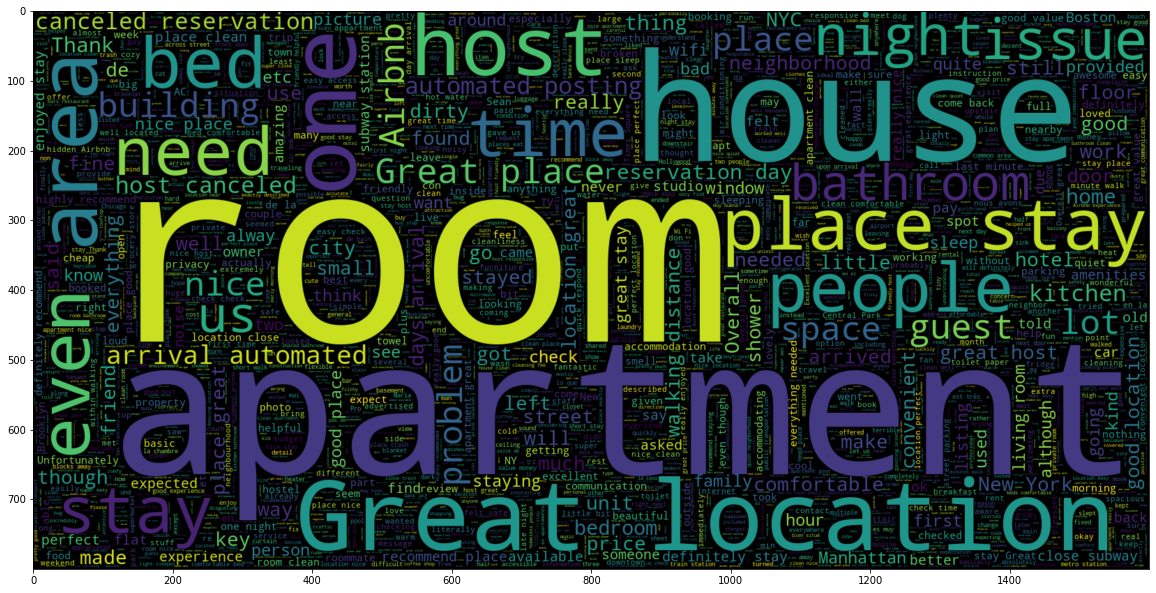

In [257]:
WordCloud_Viz(X, y, bad)

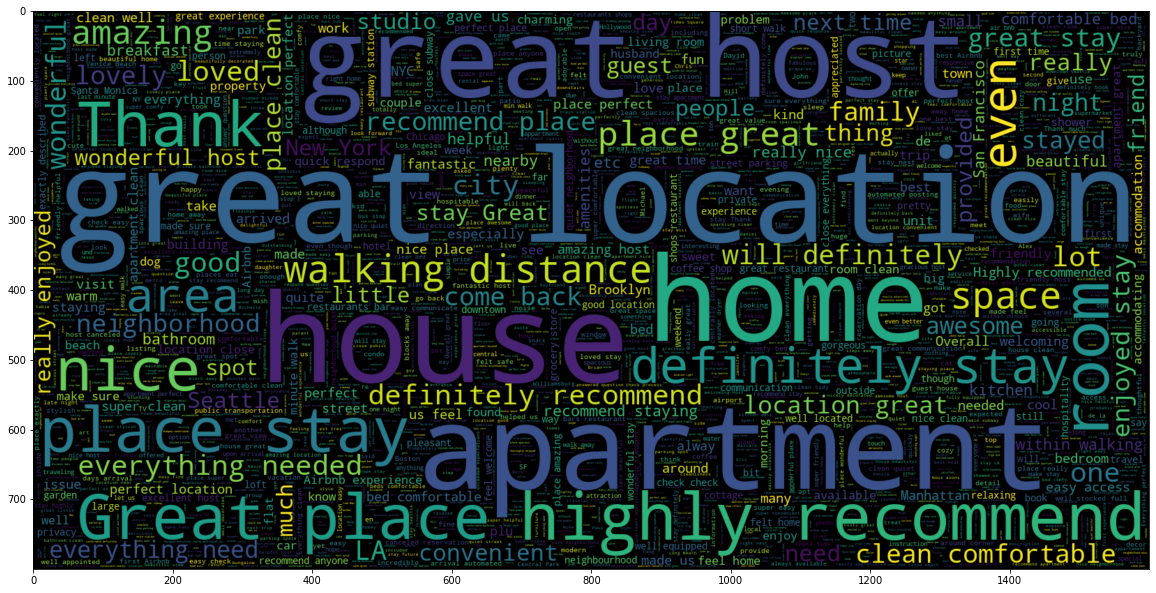

In [258]:
WordCloud_Viz(X, y, good)

# Rating Prediction

### Logistic Regression Model on Word Count

In [259]:
c = CountVectorizer(stop_words = 'english')
def text_fit(X, y, model, clf_model, coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(10).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(10).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())

# features: 63380
# train records: 52903
# test records: 17635


/Users/liuxuan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Accuracy: 0.7933654664020414

-Top 20 positive-
     Word  Coefficient
      jim     2.101438
    brady     2.055877
   creaky     1.879544
   castro     1.856063
 kathleen     1.846598
     pete     1.795990
    sammy     1.784718
 patricia     1.782322
    erica     1.752652
      bel     1.726882

-Top 20 negative-
    Word  Coefficient
      vu    -2.120967
  bowery    -2.199198
    dany    -2.266113
 jullett    -2.278675
   ahmed    -2.292336
    shae    -2.338668
   bunmi    -2.391359
   seith    -2.436002
   santi    -2.510362
    bobi    -2.912617


### Logistic regression model on TFIDF

In [260]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 63380
# train records: 52903
# test records: 17635


/Users/liuxuan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Accuracy: 0.7904167848029486

-Top 20 positive-
            Word  Coefficient
         seattle     4.559783
         stocked     3.712706
       appointed     3.262603
          snacks     3.191599
 recommendations     3.141088
       beautiful     2.950686
            tips     2.945744
         touches     2.893117
           hosts     2.866947
           brian     2.829633

-Top 20 negative-
      Word  Coefficient
        vu    -3.047755
   cleaned    -3.104998
       pay    -3.367716
     basic    -3.372859
 roommates    -3.738804
      bobi    -3.900370
     staff    -4.169334
    hostel    -4.246424
     dirty    -4.444607
      sean    -5.344843


### Logistic regression model on ngram + TFIDF

In [261]:
tfidf_n = TfidfVectorizer(ngram_range = (1,2), stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 797743
# train records: 52903
# test records: 17635


/Users/liuxuan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Accuracy: 0.7865041111426141

-Top 20 positive-
      Word  Coefficient
   seattle     6.530322
 beautiful     5.466675
     hosts     4.959459
    lovely     4.671761
 wonderful     4.226585
    highly     3.999176
   stocked     3.925759
    coffee     3.923683
      tips     3.647367
    snacks     3.616409

-Top 20 negative-
   Word  Coefficient
   bobi    -3.708053
  basic    -3.794216
    pay    -3.812366
  small    -3.814990
  price    -4.399395
 people    -4.400421
 hostel    -4.588221
  staff    -4.792170
  dirty    -5.608855
   sean    -6.622225


In [262]:
text_fit(X, y, tfidf_n, DummyClassifier(), 0)

# features: 797743
# train records: 52903
# test records: 17635
Model Accuracy: 0.4981570740005671


/Users/liuxuan/anaconda3/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [263]:

import nltk
nltk.data.path.append("/Users/joaeechew/dev/nltk_data")

from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.ldamodel import LdaModel

import itertools
from collections import Counter
from collections import defaultdict

import json
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

ModuleNotFoundError: No module named 'gensim'

In [1]:
# Seperate NLP features
corpus = df_review['comments']
print("Dataset has {} rows, {} columns.".format(*df.shape))

NameError: name 'df_review' is not defined

In [269]:
def preprocess_text(corpus):
    """Takes a corpus in list format and applies basic preprocessing steps of word tokenization,
     removing of english stop words, lower case and lemmatization."""
    processed_corpus = []
    english_words = set(nltk.corpus.words.words())
    english_stopwords = set(stopwords.words('english'))
    wordnet_lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'[\w|!]+')
    for row in corpus:
        word_tokens = tokenizer.tokenize(row)
        word_tokens_lower = [t.lower() for t in word_tokens]
        word_tokens_lower_english = [t for t in word_tokens_lower if t in english_words or not t.isalpha()]
        word_tokens_no_stops = [t for t in word_tokens_lower_english if not t in english_stopwords]
        word_tokens_no_stops_lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in word_tokens_no_stops]
        processed_corpus.append(word_tokens_no_stops_lemmatized)
    return processed_corpus


In [270]:
english_words = set(nltk.corpus.words.words())
english_words

LookupError: 
**********************************************************************
  Resource [93mwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('words')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/words[0m

  Searched in:
    - '/Users/liuxuan/nltk_data'
    - '/Users/liuxuan/anaconda3/nltk_data'
    - '/Users/liuxuan/anaconda3/share/nltk_data'
    - '/Users/liuxuan/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/Users/joaeechew/dev/nltk_data'
**********************************************************************


In [271]:
pip install --user -U nltk

Requirement already up-to-date: nltk in /Users/liuxuan/anaconda3/lib/python3.6/site-packages (3.5)
Note: you may need to restart the kernel to use updated packages.


In [272]:
pip install --user -U numpy

     |████████████████████████████████| 15.2 MB 4.1 MB/s eta 0:00:01
ERROR: tensorflow 2.1.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.
